### Pour ce TP 2 vous n'aurez pas d'indication sur la routine d'analyse notamment les NAN, les min, les max, les describe etc. bref ce qui a été vu au cours précédent. 
### Les exercices ne sont pas forcément à faire dans l'ordre !

# Partie 1 : Étude de la liaison entre variables quantitatives

## DataSet : "Voiture_Conso.xlsx"

In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

# df = pd.read_csv("Voiture_Conso.csv", delimiter="|")
df = pd.read_excel("Voiture_Conso.xlsx")

In [2]:
df.head()

,Numero,Modele,Cylindree,Puissance,Poids,Conso
0,1,Daihatsu Cuore,846,32,650,5.7
1,2,Suzuki Swift 1.0 GLS,993,39,790,5.8
2,3,Fiat Panda Mambo L,899,29,730,6.1
3,4,VW Polo 1.4 60,1390,44,955,6.5
4,5,Opel Corsa 1.2i Eco,1195,33,895,6.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Numero      28 non-null     int64  
 1   Modele      28 non-null     object 
 2   Cylindree   28 non-null     int64  
 3   Puissance   28 non-null     int64  
 4   Poids       28 non-null     int64  
 5   Conso       28 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.4+ KB


In [4]:
df.Modele.unique()

array(['Daihatsu Cuore', 'Suzuki Swift 1.0 GLS', 'Fiat Panda Mambo L',
       'VW Polo 1.4 60', 'Opel Corsa 1.2i Eco', 'Subaru Vivio 4WD',
       'Toyota Corolla', 'Opel Astra 1.6i 16V', 'Peugeot 306 XS 108',
       'Renault Safrane 2.2. V', 'Seat Ibiza 2.0 GTI', 'VW Golt 2.0 GTI',
       'Citroen ZX Volcane', 'Fiat Tempra 1.6 Liberty',
       'Fort Escort 1.4i PT', 'Honda Civic Joker 1.4', 'Volvo 850 2.5',
       'Ford Fiesta 1.2 Zetec', 'Hyundai Sonata 3000', 'Lancia K 3.0 LS',
       'Mazda Hachtback V', 'Mitsubishi Galant', 'Opel Omega 2.5i V6',
       'Peugeot 806 2.0', 'Nissan Primera 2.0', 'Seat Alhambra 2.0',
       'Toyota Previa salon', 'Volvo 960 Kombi aut'], dtype=object)

In [5]:
df[df.Modele == "Daihatsu Cuore"]

,Numero,Modele,Cylindree,Puissance,Poids,Conso
0,1,Daihatsu Cuore,846,32,650,5.7


In [6]:
df.columns

Index(['Numero', 'Modele', 'Cylindree ', 'Puissance ', 'Poids ', 'Conso'], dtype='object')

<AxesSubplot:xlabel='Cylindree ', ylabel='Puissance '>

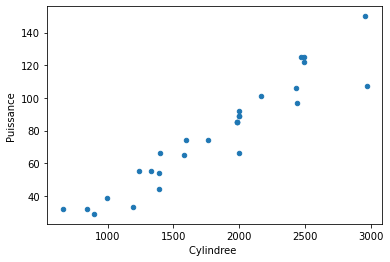

In [7]:
df.plot(kind="scatter",x="Cylindree ",y="Puissance ")

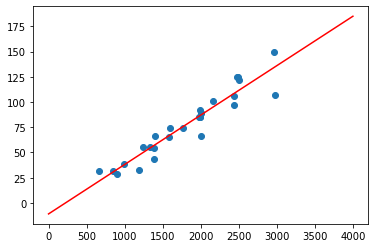

In [8]:

xy = np.array([df["Cylindree "], df["Puissance "]])
X = np.array(df["Cylindree "])
Y = np.array(df["Puissance "])
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
result = scipy.stats.linregress(xy)

ordonne = np.linspace(0,4000,100)

a = result.slope
b = result.intercept

plt.scatter(X,Y)
plt.plot(ordonne,a*ordonne+b,color='r')

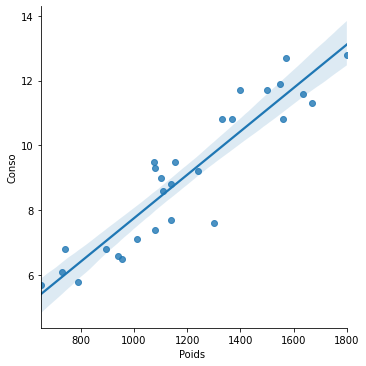

In [9]:
sns.lmplot(x="Poids ", y="Conso", data=df);

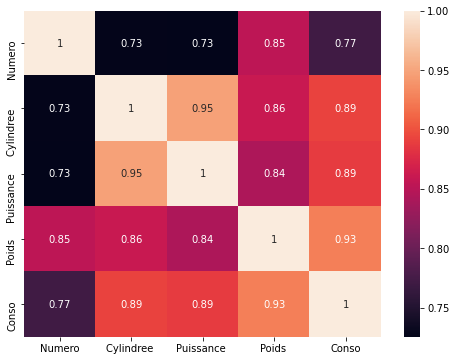

In [10]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

# Partie 2 : Étude de la liaison entre variables qualitatives

## DataSet 2.1 "Quantitatif.txt" (vu en cours)

In [11]:
df = pd.read_table("qualitatif.txt", delimiter=" ")

In [12]:
df.head()

,cheveux,yeux,sexe
0,Noir,Marron,Male
1,Blond,Bleu,Femelle
2,Noir,Bleu,Male
3,Marron,Marron,Femelle
4,Roux,Marron,Male


In [13]:
df.columns

Index(['cheveux', 'yeux', 'sexe'], dtype='object')

In [14]:
pd.crosstab(df.cheveux, df.yeux, margins=True)

yeux,Bleu,Marron,Noisette,Vert,All
cheveux,,,,,
Blond,94,7,10,16,127
Marron,84,119,54,29,286
Noir,20,68,15,5,108
Roux,17,26,14,14,71
All,215,220,93,64,592


In [15]:
pd.crosstab([df.cheveux, df.sexe], df.yeux, margins=True)

yeux             Bleu  Marron  Noisette  Vert  All
cheveux sexe                                      
Blond   Femelle    64       4         5     8   81
        Male       30       3         5     8   46
Marron  Femelle    34      81        29    14  158
        Male       50      38        25    15  128
Noir    Femelle     9      36         5     2   52
        Male       11      32        10     3   56
Roux    Femelle     7      16         7     7   37
        Male       10      10         7     7   34
All               215     220        93    64  592

<AxesSubplot:xlabel='cheveux'>

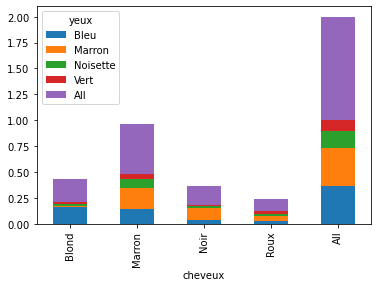

In [16]:
pd.crosstab(df.cheveux, df.yeux, margins=True, normalize=True).plot.bar(stacked=True)

<AxesSubplot:xlabel='cheveux'>

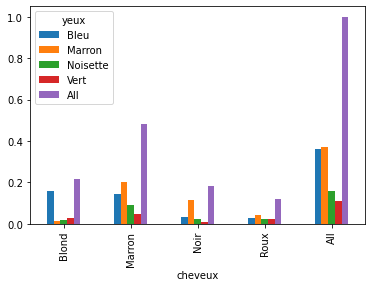

In [17]:
pd.crosstab(df.cheveux, df.yeux, margins=True, normalize=True).plot.bar(stacked=False)

<AxesSubplot:xlabel='cheveux,yeux'>

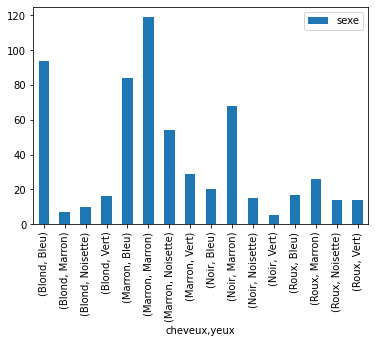

In [18]:
df.groupby(['cheveux', 'yeux']).count().plot.bar()

## DataSet 2.2 (intégré dans le code) Indépendance de variable qualitatives

Aujourd’hui, il vous prend la soudaine envie de faire des statistiques sur les habitants de votre ville. Vous souhaitez connaître leurs boissons préférées parmi celles-ci : café, thé, eau, ou autre.

Vous réalisez donc votre enquête en vous rendant dans les cafés pour observer discrètement les clients et noter la boisson qu’ils ont commandé. Vous souhaitez rassembler un échantillon de 100 personnes. Pour chacune d’elle, vous avez noté la boisson commandée et le nom du café dans lequel vous l’avez observée. On appellera ces deux variables nom café et boisson préférée . Voici la distribution que vous obtenez pour la variable boisson préférée:

    café : 50 personnes sur 100, soit f(cafe) = 50 %
    thé : 30 personnes sur 100, soit f(the) = 30 %
    autres boissons : 20 personnes sur 100, soit f(autre)= 20 %

Vous continuez votre enquête en vous rendant dans un café où il y a 10 clients. Combien de personnes vous attendez-vous à voir face à un thé ? Intuitivement, vous vous attendez à trouver 3 personnes qui ont commandé un thé car vous savez qu’en général, 30 % des personnes commandent un thé. Vous avez donc réalisé le calcul suivant : 30%*10 = 3.
De même, vous vous attentez à voir 5 personnes avec un café, et 2 personnes avec d’autres boissons.

A votre grande surprise, il y a en fait 9 personnes avec du thé, et seulement 1 avec un café ! Cela diffère beaucoup de ce à quoi vous vous attentiez : il y a 90 % de personnes qui boivent du thé. C'est peut-être un hasard, alors vous décidez de revenir régulièrement pour savoir si ce 90 % se confirme de jour en jour ou pas. Effectivement, ce pourcentage reste à peu près constant même après de nombreuses observations !

Mais vous comprenez vite pourquoi en regardant le nom du café : « Salon de thé Chez Luc ». Vous êtes dans un café un peu spécial : c’est un salon de thé ! Les clients qui fréquentent cet endroit sont donc principalement des amateurs de thé.

On dit alors que le fait d’aimer le thé et le fait de fréquenter le salon de thé Chez Luc ne sont pas indépendants. Si deux événements ne sont pas indépendants, alors on s’attend à trouver une corrélation entre ceux-ci. Vous souvenez de la question que l'on se pose pour les corrélations : Sachant que l'on connaît la valeur d'une variable, peut-on avoir une indication un peu plus précise sur la valeur d'une autre variable ?

QUESTION : Sachant qu’une personne fréquente le café Salon de thé Chez Luc, peut-on avoir une indication un peu plus précise sur sa boisson préférée ?

A FAIRE : utilisation du Khi_2 ... et bien sur tout ce qui va avant, tableau de contingence etc ...

In [19]:
# DataSet de votre enquête
# touchez à rien !

X = ["Chez Luc"]*10
X.extend(["Au café Dembas"]*20)
X.extend(["Au café Ducoing"]*40)
X.extend(["Chez Sarah"]*30)
 
Y = ["Café"]*1
Y.extend(["Thé"]*9)
Y.extend(["Autre"]*0)
 
Y.extend(["Café"]*9)
Y.extend(["Thé"]*6)
Y.extend(["Autre"]*5)
 
Y.extend(["Café"]*20)
Y.extend(["Thé"]*10)
Y.extend(["Autre"]*10)
 
Y.extend(["Café"]*20)
Y.extend(["Thé"]*5)
Y.extend(["Autre"]*5)
 
data = {
    'bar':X,
    'boisson':Y
}
df_Khi2 = pd.DataFrame(data)

In [20]:
df_Khi2.head()

,bar,boisson
0,Chez Luc,Café
1,Chez Luc,Thé
2,Chez Luc,Thé
3,Chez Luc,Thé
4,Chez Luc,Thé


In [21]:
df_Khi2.groupby(['bar']).count()

,boisson
bar,
Au café Dembas,20
Au café Ducoing,40
Chez Luc,10
Chez Sarah,30


In [22]:
encoded_data = pd.get_dummies(data=df_Khi2, columns=['boisson'])
encoded_data

,bar,boisson_Autre,boisson_Café,boisson_Thé
0,Chez Luc,0,1,0
1,Chez Luc,0,0,1
2,Chez Luc,0,0,1
3,Chez Luc,0,0,1
4,Chez Luc,0,0,1
...,...,...,...,...
95,Chez Sarah,1,0,0
96,Chez Sarah,1,0,0
97,Chez Sarah,1,0,0
98,Chez Sarah,1,0,0


In [44]:
encoded_data.groupby(['bar']).count()

,boisson_Autre,boisson_Café,boisson_Thé
bar,,,
Au café Dembas,20,20,20
Au café Ducoing,40,40,40
Chez Luc,10,10,10
Chez Sarah,30,30,30


In [41]:
from scipy.stats import chi2_contingency

array = np.array(encoded_data.groupby(['bar']).count())
array

array([[20, 20, 20],
       [40, 40, 40],
       [10, 10, 10],
       [30, 30, 30]])

In [43]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
obs

array([[10, 10, 20],
       [20, 20, 20]])

In [46]:
chi2_contingency(array)

(0.0,
 1.0,
 6,
 array([[20., 20., 20.],
        [40., 40., 40.],
        [10., 10., 10.],
        [30., 30., 30.]]))